In [ ]:
# Montando o Google Drive para acessar arquivos armazenados lá
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando as bibliotecas essenciais para análise de dados e visualização
import pandas as pd  # Para manipulação de dataframes
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para geração de gráficos
import seaborn as sns  # Para visualizações estatísticas mais avançadas

#Análise Exploratória de Dados

In [ ]:
# Lendo o arquivo CSV 'IMBD.csv' do Google Drive e armazenando em um DataFrame
df = pd.read_csv("/content/drive/MyDrive/Ciência de Dados/Curso - Introdução a Machine Learning/Módulo 2 - Métodos de Aprendizado de Máquina e suas Aplicações/Regressão Linear e Logística/IMDB_Dataset.csv")

In [ ]:
# Mostrando as primeiras linhas para entender o dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Mostrando as últimas linhas para entender o dataset
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
# Mostrando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Verificando a distribuição de sentimentos no dataset
df.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


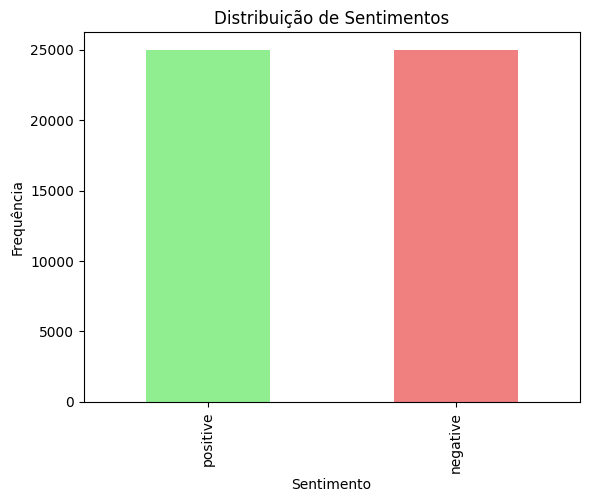

In [ ]:
# Contagem de sentimentos (positivo vs negativo)
df['sentiment'].value_counts().plot(kind='bar', color=['#90EE90', '#F08080'])
plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Frequência")
plt.show()

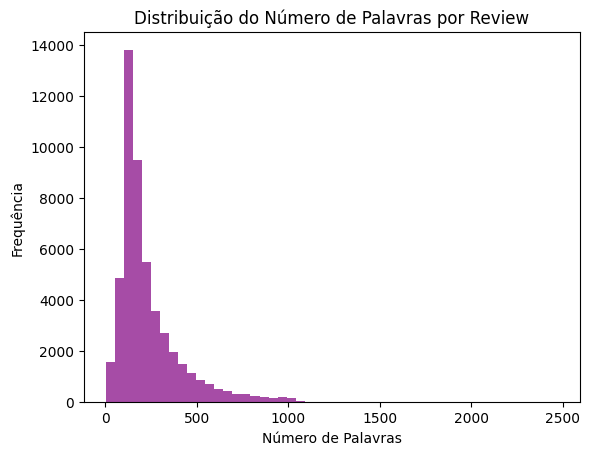

In [ ]:
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

# Distribuição do tamanho das avaliações
plt.hist(df["review_length"], bins=50, color="purple", alpha=0.7)
plt.title("Distribuição do Número de Palavras por Review")
plt.xlabel("Número de Palavras")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Importando a classe WordCloud do módulo wordcloud para a criação de nuvens de palavras.
from wordcloud import WordCloud

In [ ]:
# União de todas as avaliações em um único texto
text = " ".join(df["review"])

# Gerar a nuvem de palavras mais comuns
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

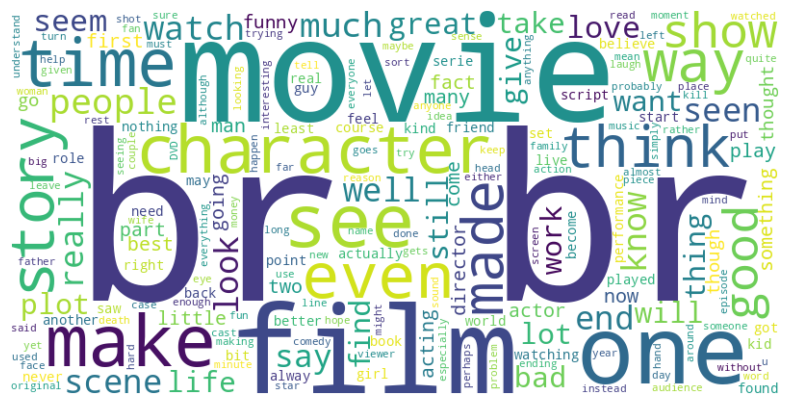

In [ ]:
# Exibir a nuvem de palavras mais comuns
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Separar avaliações positivas
positive_text = " ".join(df[df["sentiment"] == "positive"]["review"])

In [ ]:
# Gerar nuvem de palavras mais comuns para classe positiva
pos_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

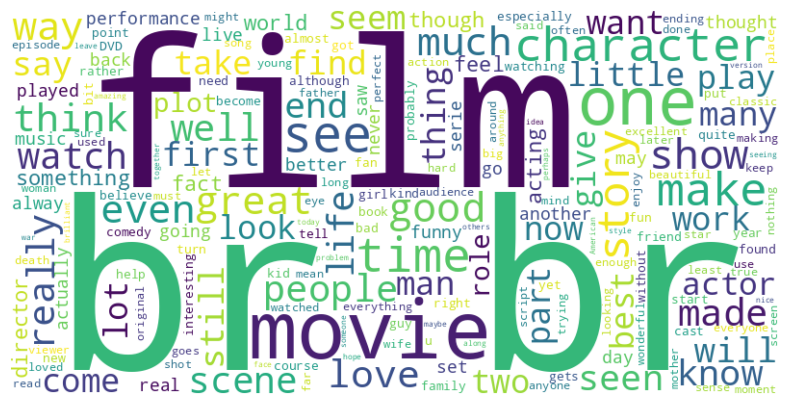

In [ ]:
# Exibir a nuvem de palavras mais comuns para a classe positiva
plt.figure(figsize=(10,5))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Separar avaliações negativas
negative_text = " ".join(df[df["sentiment"] == "negative"]["review"])

In [ ]:
# Gerar nuvem de palavras mais comuns para classe negativa
neg_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

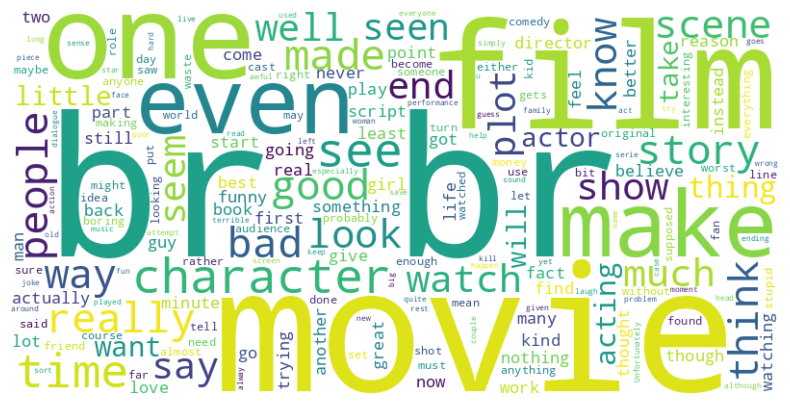

In [ ]:
# Exibir a nuvem de palavras mais comuns para a classe negativa
plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Definir stopwords e pontuação para remoção
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [ ]:
def process_text(text):
    """Tokeniza o texto, remove stopwords e pontuação"""
    tokens = word_tokenize(text.lower())  # Converter para minúsculas e tokenizar
    words = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remover stopwords e pontuação
    return words

In [ ]:
# Processar avaliações para cada classe
positive_words = process_text(positive_text)
negative_words = process_text(negative_text)

In [ ]:
# Contar frequência das palavras
positive_freq = Counter(positive_words).most_common(20)
negative_freq = Counter(negative_words).most_common(20)

In [ ]:
# Exibir frequência de palavras mais comuns para a classe positiva
print("Palavras mais comuns em avaliações POSITIVAS:")
print(positive_freq)

Palavras mais comuns em avaliações POSITIVAS:
[('br', 97954), ('film', 40765), ('movie', 36706), ('one', 26537), ('like', 17231), ('good', 14492), ('great', 12811), ('story', 12531), ('see', 11978), ('time', 11867), ('would', 11251), ('well', 11230), ('also', 10727), ('really', 10713), ('even', 9575), ('much', 9067), ('first', 8979), ('people', 8609), ('love', 8455), ('best', 8350)]


In [ ]:
# Exibir frequência de palavras mais comuns para a classe negativa
print("\nPalavras mais comuns em avaliações NEGATIVAS:")
print(negative_freq)


Palavras mais comuns em avaliações NEGATIVAS:
[('br', 103997), ('movie', 48364), ('film', 36154), ('one', 25291), ('like', 21952), ('would', 15224), ('even', 15205), ('good', 14275), ('bad', 14223), ('really', 12311), ('time', 11614), ('could', 11342), ('see', 10660), ('get', 10058), ('much', 9953), ('story', 9810), ('people', 9353), ('make', 9010), ('made', 8416), ('first', 8221)]


#Pré-Processamento de Dados

In [ ]:
# Importando TF-IDF para vetorizar o texto, transformando-o em uma representação numérica.
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Definindo corpus
corpus = df['review']

In [ ]:
# Inicializando e aplicando o vetorizador TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
# Definindo a variável alvo (sentimento)
y = df['sentiment']

In [ ]:
# Importando LabelEncoder para converter as labels.
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Criando uma variável para armazenar o método escolhido
encoder = LabelEncoder()

In [ ]:
# Convertendo as labels de 'positive' e 'negative' em números.
y = encoder.fit_transform(y)

In [ ]:
# Importando train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split, cross_validate

In [ ]:
# Dividindo os dados em treino e teste (67% para treino, 33% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Verificando o tamanho dos conjuntos de dados
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33500, 101895), (16500, 101895), (33500,), (16500,))

#Processamento de Dados

In [ ]:
# Importando LogisticRegression para treinar um modelo de regressão logística.
from sklearn.linear_model import LogisticRegression

In [ ]:
# Criando uma variável para armazenar o modelo escolhido
model = LogisticRegression()

In [ ]:
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazendo predições no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Importando as métricas para avaliar o desempenho do modelo
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
# Calcula e imprime a acurácia do modelo.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}% ")

Acurácia: 89.72% 


In [ ]:
# Calcula e imprime a precisão do modelo.
precision = precision_score(y_test, y_pred)
print(f"Precisão: {precision * 100:.2f}%")

Precisão: 88.75%


In [ ]:
# Calcula e imprime a sensibilidade do modelo.
recall = recall_score(y_test, y_pred)
print(f"Precisão: {recall * 100:.2f}%")

Precisão: 91.09%


In [ ]:
# Executa a validação cruzada para obter uma estimativa melhor da acurácia, do precision e do recall do modelo.
valid_cross = cross_validate(model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall'])
print(f"Accuracy: {valid_cross['test_accuracy'].mean()*100:.4f}%")
print(f"Precision: {valid_cross['test_precision'].mean()*100:.4f}%")
print(f"Recall: {valid_cross['test_recall'].mean()*100:.4f}%")

Accuracy: 89.0925%
Precision: 88.2860%
Recall: 90.0885%


In [ ]:
# A matriz de confusão é uma tabela que descreve o desempenho do modelo de classificação.
cm = confusion_matrix(y_test, y_pred)

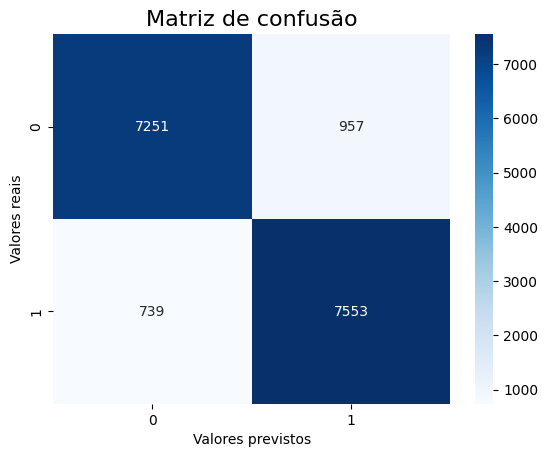

In [ ]:
# Criando um mapa de calor (heatmap) da matriz de confusão usando a biblioteca seaborn.
cm_plot = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
cm_plot.set_xlabel('Valores previstos')
cm_plot.set_ylabel('Valores reais')
cm_plot.set_title('Matriz de confusão', size=16)
plt.show()

#Tunagem de Hiperparâmetros

In [ ]:
# Importando as bibliotecas necessárias para tunagem de hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definindo o espaço de parâmetros para o GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

In [ ]:
# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='precision',
    cv=5,
    n_jobs=-1  # Usa todos os núcleos disponíveis para paralelização
)

In [ ]:
# Executando o GridSearchCV nos dados de treino
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1170 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_so

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='precision')

In [ ]:
# Melhores parâmetros e melhor pontuação
print("Melhores parâmetros encontrados: ", grid_search.best_params_)
print("Melhor pontuação encontrada: ", grid_search.best_score_)

Melhores parâmetros encontrados:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor pontuação encontrada:  0.890662299034674


In [ ]:
# Extraindo o melhor modelo encontrado
best_model = grid_search.best_estimator_

In [ ]:
# Avaliando o modelo com os melhores parâmetros nos dados de teste
y_pred_best = best_model.predict(X_test)

In [ ]:
# Calculando e imprimindo a acurácia do modelo
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAcurácia com os melhores parâmetros: {accuracy * 100:.2f}% ")


Acurácia com os melhores parâmetros: 90.13% 


In [ ]:
# Calculando e imprimindo a precisão do modelo
precision_best = precision_score(y_test, y_pred_best)
print(f"Precisão com os melhores parâmetros: {precision * 100:.2f}%")

Precisão com os melhores parâmetros: 89.34%


In [ ]:
# Calculando e imprimindo o recall do modelo
recall_best = recall_score(y_test, y_pred_best)
print(f"Recall com os melhores parâmetros: {recall * 100:.2f}%")

Recall com os melhores parâmetros: 91.24%


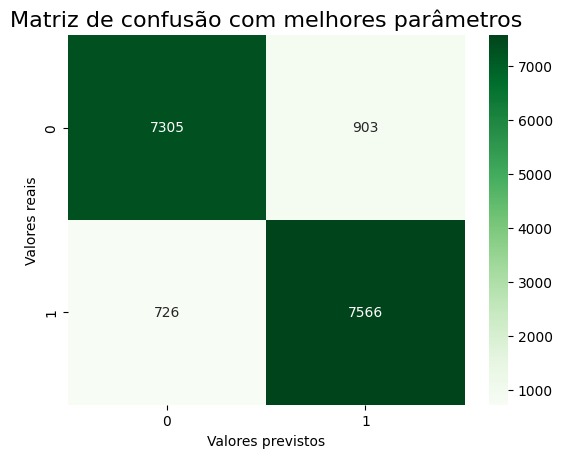

In [ ]:
# Calculando e imprimindo a matriz de confusão
cm_best = confusion_matrix(y_test, y_pred_best)
cm_plot = sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
cm_plot.set_xlabel('Valores previstos')
cm_plot.set_ylabel('Valores reais')
cm_plot.set_title('Matriz de confusão com melhores parâmetros', size=16)
plt.show()